# INTRODUCTION.

 Decision Tree algorithm belongs to the family of supervised learning algorithms.
 
 In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

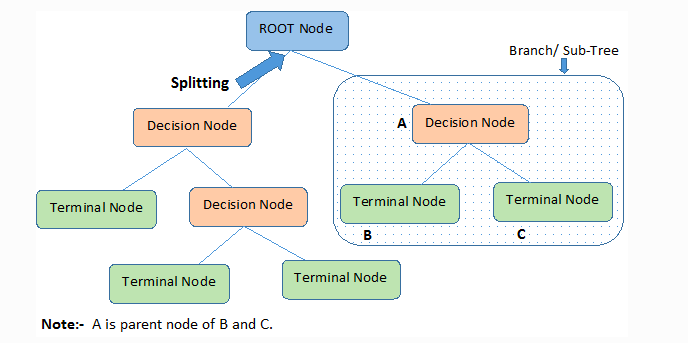

**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

**LOAD THE DATASET**

In [2]:
#reading the data
data=pd.read_csv('Loan data cleaned.csv')

In [3]:
#shape of the data
data.shape

(4368, 64)

In [4]:
#first five rows of the data
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,Good,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,Good,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,Good,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


In [5]:
#checking missing values in the data
data.isnull().sum()

loannumber                        0
loanamount                        0
totaldue                          0
termdays                          0
good_bad_flag                     0
                                 ..
ploan_additional charges_25%_y    0
ploan_additional charges_50%_y    0
ploan_additional charges_75%_y    0
ploan_additional charges_max_y    0
not_repaid_percentage             0
Length: 64, dtype: int64

In [6]:
#make dummies of categorical columns('bank_account_type','bank_name_clients','employment_status_clients')
data=pd.get_dummies(data=data,columns=['bank_account_type','bank_name_clients','employment_status_clients'],drop_first=True)

**MODEL WITH DEFAULT VALUES**

In [7]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

In [8]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.15)

In [10]:
#Scalig the train and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [11]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.782058
1    0.217942
Name: good_bad_flag, dtype: float64

In [12]:
# distribution in testing set
y_test.value_counts(normalize=True)

0    0.782012
1    0.217988
Name: good_bad_flag, dtype: float64

In [13]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=101,class_weight='balanced')

In [14]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [15]:
pred_train=dt_model.predict(X_train)
pred_test=dt_model.predict(X_test)
f1_train=f1_score(y_train,pred_train)
f1_test=f1_score(y_test,pred_test)

In [16]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, y_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2903
           1       1.00      1.00      1.00       809

    accuracy                           1.00      3712
   macro avg       1.00      1.00      1.00      3712
weighted avg       1.00      1.00      1.00      3712



In [17]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, y_test))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       525
           1       0.33      0.36      0.34       131

    accuracy                           0.73       656
   macro avg       0.58      0.59      0.58       656
weighted avg       0.73      0.73      0.73       656



**INFERENCE**

--As we can see training score is more than testing which represents the presence of overfitting.

--Model is doing pretty well for class 0 but not as good for class1.

--Recall for defaulters is 0.33 that means out of total actual postivites 33% it is predicting correctly.

In [18]:
from sklearn import tree
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

In [19]:
!dot -Tpng tree.dot -o tree.png

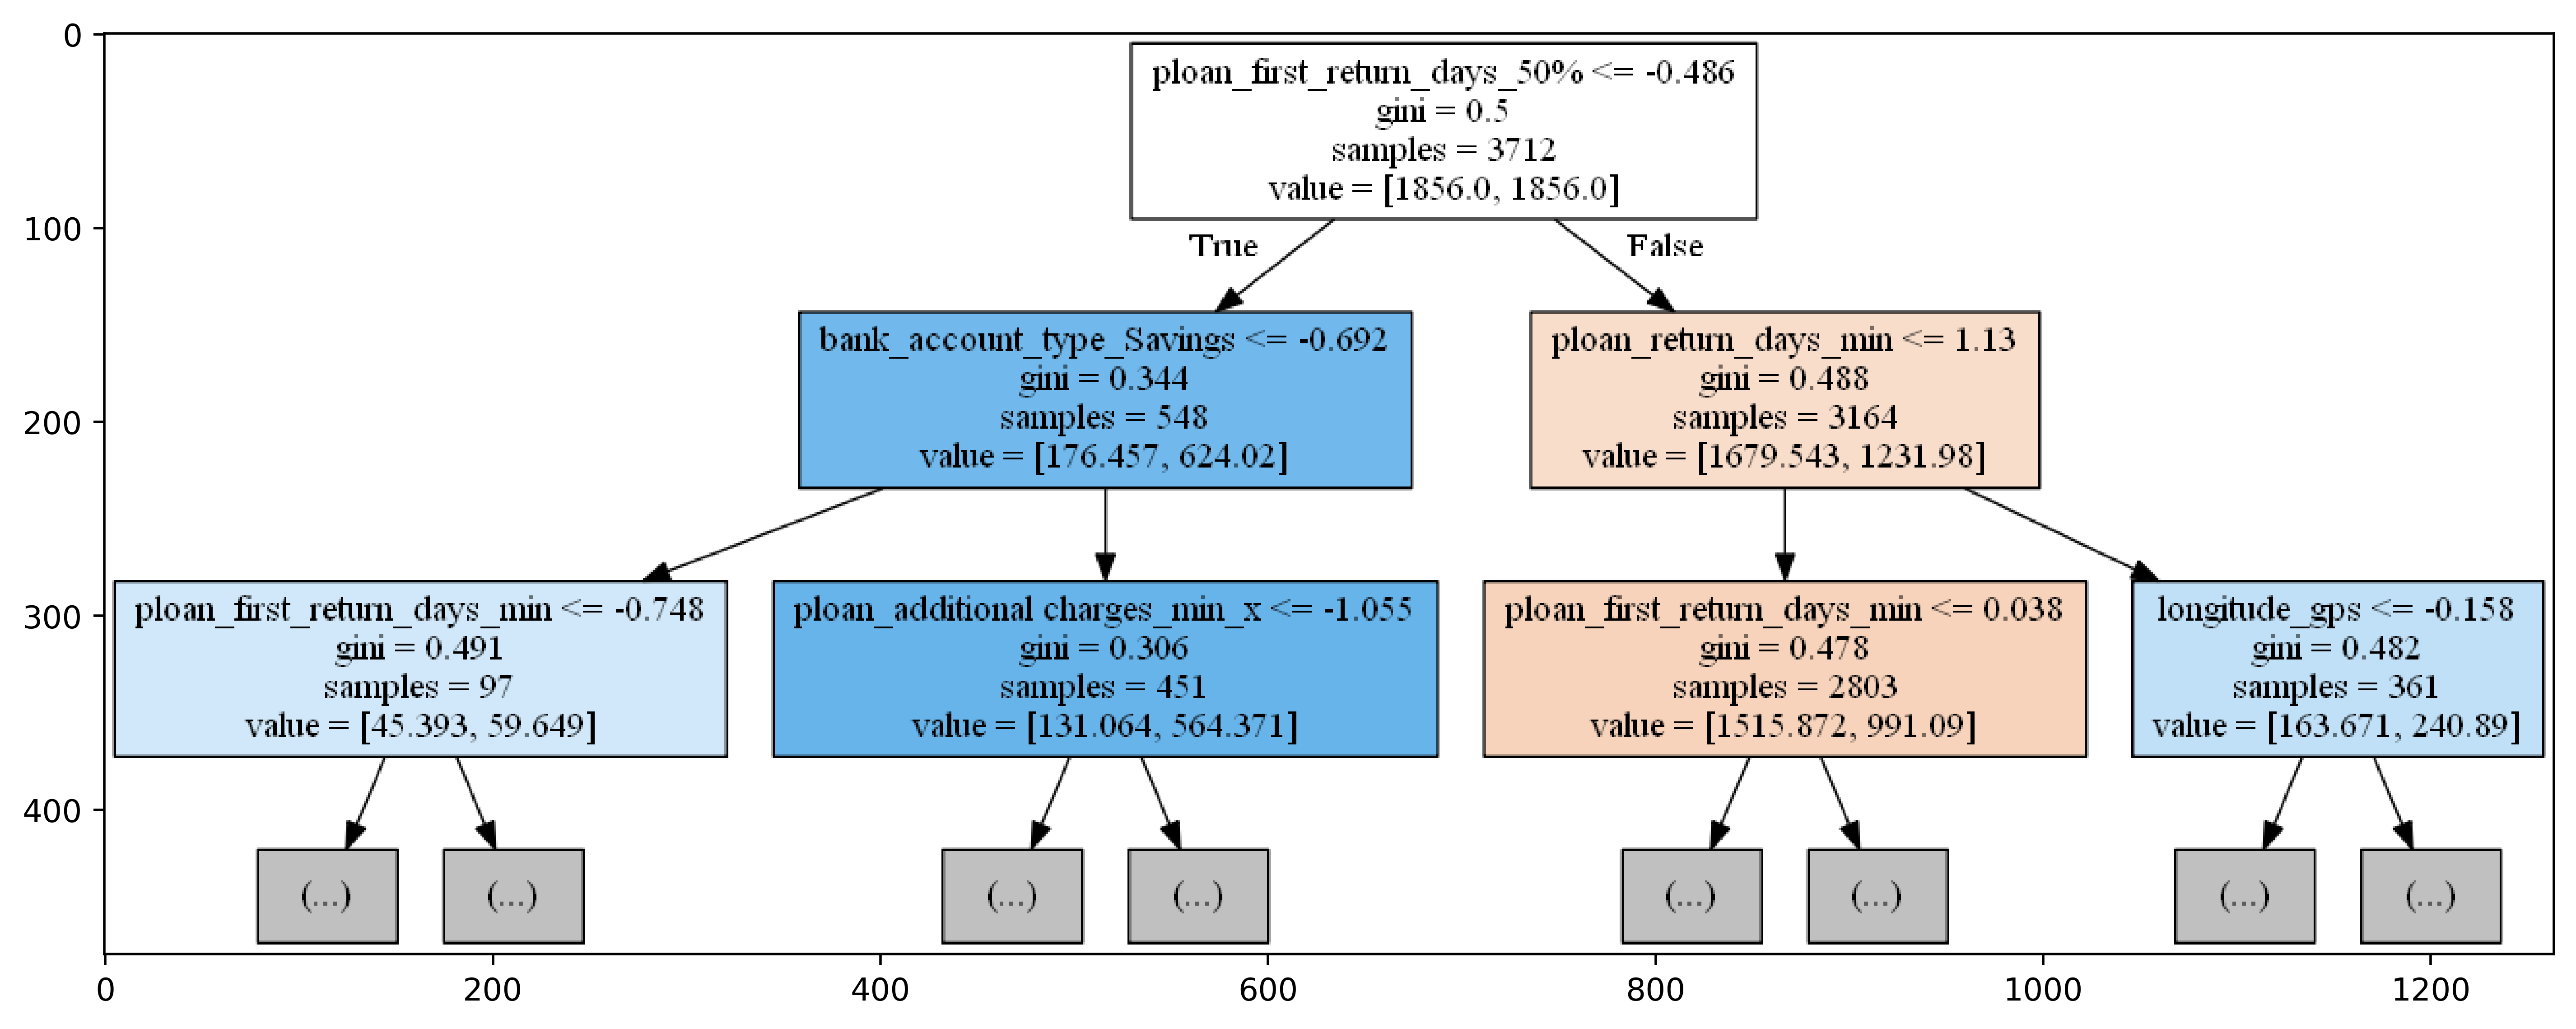

In [20]:
image = plt.imread('tree.png')
plt.figure(figsize=(14,14),dpi=500)
plt.imshow(image)

# GRID SEARCH 
     + CROSS VALIDATION

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.model_selection import StratifiedKFold

In [23]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split':[2,4,8,10,15,25,30,40,50,55],'max_leaf_nodes':range(5,30,5)}
clf = GridSearchCV(estimator=dt_model,param_grid=tree_para,scoring='f1',cv=StratifiedKFold(10))
clf=clf.fit(X_train, y_train)

In [24]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 25,
 'min_samples_split': 40}

In [25]:
clf_pred_test=clf.predict(X_test)
clf_pred_train=clf.predict(X_train)

In [26]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(clf_pred_test, y_test))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       478
           1       0.51      0.41      0.45       178

    accuracy                           0.73       656
   macro avg       0.65      0.63      0.64       656
weighted avg       0.72      0.73      0.72       656



In [27]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(clf_pred_train, y_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2554
           1       0.63      0.44      0.52      1158

    accuracy                           0.74      3712
   macro avg       0.70      0.66      0.67      3712
weighted avg       0.73      0.74      0.73      3712



**INFERENCE**

--Again we can see overfitting.

--Recall for test data has increased from 33% to 60% almost double.

--There is no improvement in f1 score of testing data.

# Cost Complexity Pruning

In [24]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [26]:
ccp_alphas

array([0.        , 0.00011199, 0.0001145 , 0.0001576 , 0.0001576 ,
       0.00016102, 0.00016314, 0.00016314, 0.00016459, 0.00016459,
       0.00016564, 0.00016564, 0.00016644, 0.00016706, 0.00016706,
       0.00016706, 0.00016798, 0.00016862, 0.00016887, 0.00016946,
       0.0002179 , 0.00024832, 0.00025549, 0.00026581, 0.0002694 ,
       0.0002694 , 0.0002694 , 0.0002694 , 0.0002694 , 0.0002694 ,
       0.0002694 , 0.0002694 , 0.0002694 , 0.0002694 , 0.0002694 ,
       0.0002694 , 0.00028892, 0.00028933, 0.0002905 , 0.0002905 ,
       0.00029337, 0.00029356, 0.00029356, 0.00029892, 0.00029921,
       0.00030234, 0.00030234, 0.00030234, 0.00030234, 0.00030234,
       0.00030234, 0.00030234, 0.00030234, 0.00030234, 0.00030234,
       0.00030234, 0.00030234, 0.00030234, 0.00030685, 0.00030772,
       0.00030992, 0.00031119, 0.00031519, 0.00031519, 0.00031519,
       0.00031519, 0.00031519, 0.00031519, 0.00031519, 0.00031519,
       0.00031519, 0.00031519, 0.00031681, 0.00031697, 0.00031

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

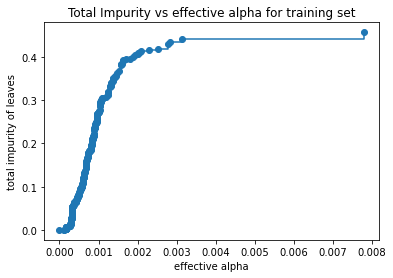

In [25]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [29]:
clfs1 = []
for ccp_alpha in ccp_alphas:
    clf1 = DecisionTreeClassifier(random_state=101, ccp_alpha=ccp_alpha)
    clf1.fit(X_train, y_train)
    clfs1.append(clf1)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs1[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.026849687206133732


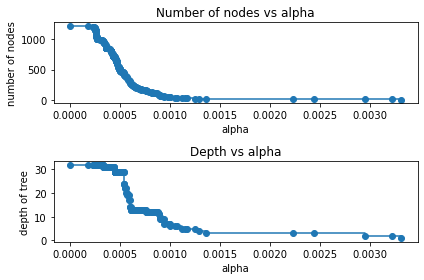

In [30]:
clfs1 = clfs1[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf1.tree_.node_count for clf1 in clfs1]
depth = [clf1.tree_.max_depth for clf1 in clfs1]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [31]:
train_f1=[]
test_f1=[]
for clf1 in clfs1:
    predict_train=clf1.predict(X_train)
    f1_train=f1_score(y_train,predict_train)
    train_f1.append(f1_train)
    predict_test=clf1.predict(X_test)
    f1_test=f1_score(y_test,predict_test)
    test_f1.append(f1_test)

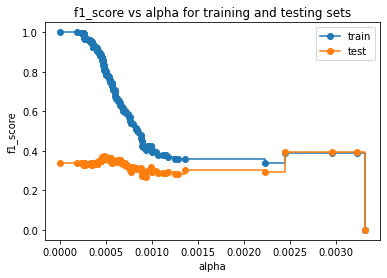

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("f1_score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_f1, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_f1, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
clf_check= DecisionTreeClassifier(random_state=100, ccp_alpha=0.0025)
clf_check.fit(X_train, y_train)
pred_check_train=clf_check.predict(X_train)
f1_check_train=f1_score(pred_check_train,y_train)
pred_check_test=clf_check.predict(X_test)
f1_check_test=f1_score(pred_check_test,y_test)

In [34]:
f1_check_test,f1_check_train

(0.3942307692307693, 0.3904761904761904)

In [35]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_check_train, y_train))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3261
           1       0.30      0.55      0.39       451

    accuracy                           0.79      3712
   macro avg       0.62      0.69      0.63      3712
weighted avg       0.85      0.79      0.82      3712



In [36]:
print('\033[1m',"Classification Report for testing data",'\033[0m')
print(classification_report(pred_check_test, y_test))

 Classification Report for testing data 
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       591
           1       0.29      0.63      0.39        65

    accuracy                           0.81       656
   macro avg       0.62      0.73      0.64       656
weighted avg       0.89      0.81      0.84       656



**INFERENCE**

--F1 score is increased to 0.39.

# CONCLUSION

Logistic Regression is doing better than knn and decision tree on loan default data

try with grid search parameeters

model3=DecisionTreeClassifier(class_weight='balanced',random_state=101,criterion='gini',max_depth=4,max_leaf_nodes=15,min_samples_split=30)

model3.fit(train_x,train_y)

pred3=model3.predict(valid_x)

pred3[:10],f1_score(valid_y, pred3)


it will give 0.47 f1 score 

refer basic ensemble notebook
